In [287]:
from glob import glob
from astropy.io import fits

import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage


# statistics
from astropy.stats import biweight_location, biweight_scale, sigma_clipped_stats
from scipy.stats import median_abs_deviation

# configuration
np.set_printoptions(linewidth=120) # para que se vea
plt.rcParams["image.cmap"] = "gray" # https://matplotlib.org/stable/users/explain/colors/colormaps.html
plt.rcParams["image.origin"] = "lower"

def quantile_imshow(img,lower=0.01,upper=0.99,**kwargs):
    img_vmin = np.quantile(img,lower)
    img_vmax = np.quantile(img,upper)
    return plt.imshow(img,vmin=img_vmin,vmax=img_vmax,**kwargs)

# M-92, imágenes desde KPNO 

Para cada parte del ejercicio, agregue tantas celdas de código o de Markdown como considere necesario.

## 1) Información

Obtenga el tipo de imagen, el objeto, y después el filtro de cada una de las imágenes en la carpeta `data/m92`.

Organice esta información como crea conveniente, ya sea en diferentes variables, en diccionarios, o en un DataFrame.

¿Por qué el bias no tiene filtro asignado?

In [288]:
from astropy.io import fits
from glob import glob
files = glob("data/m92/*.fit")
print(files)
for file in files:
    print(fits.info(file))
files

['data/m92\\m92_1.fit', 'data/m92\\m92_2.fit', 'data/m92\\m92_3.fit', 'data/m92\\m92_4.fit', 'data/m92\\m92_5.fit', 'data/m92\\m92_6.fit', 'data/m92\\m92_7.fit']
Filename: data/m92\m92_1.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      43   (352, 512)   int16   
None
Filename: data/m92\m92_2.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      43   (352, 512)   int16   
None
Filename: data/m92\m92_3.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      43   (352, 512)   int16   
None
Filename: data/m92\m92_4.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      43   (352, 512)   int16   
None
Filename: data/m92\m92_5.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      43   (352, 512)   int16   
None
Filename: data/m92\m92_6.fit
No.    Na

['data/m92\\m92_1.fit',
 'data/m92\\m92_2.fit',
 'data/m92\\m92_3.fit',
 'data/m92\\m92_4.fit',
 'data/m92\\m92_5.fit',
 'data/m92\\m92_6.fit',
 'data/m92\\m92_7.fit']

In [292]:
fits.getheader(files[5])

SIMPLE  =                    T  /  FITS STANDARD                                
BITPIX  =                   16  /  FITS BITS/PIXEL                              
NAXIS   =                    2  /  NUMBER OF AXES                               
NAXIS1  =                  352  /                                               
NAXIS2  =                  512  /                                               
BSCALE  =       1.0000000000E0  /  REAL = TAPE*BSCALE + BZERO                   
BZERO   =       0.0000000000E0  /                                               
OBJECT  = 'M-92 B  '            /                                               
ORIGIN  = 'KPNO-IRAF'           /                                               
DATE    = '17-09-93'            /                                               
IRAFNAME= 'm92014.imh'          /  NAME OF IRAF IMAGE FILE                      
IRAF-MAX=           4.942000E3  /  DATA MAX                                     
IRAF-MIN=           4.800000

In [293]:
dic=[]
for i,k in enumerate(files):
    M=[]
    M.append(i+1)
    M.append(fits.getheader(k)["IMAGETYP"])
    M.append(fits.getheader(k)["OBJECT"])
    M.append("JEJEJE")
    dic.append(M)

In [428]:
BIAS_2=images[0]
FLATB_2=images[1]
FLATV_2=images[2]
SCI1V_2=images[3]
SCI2V_2=images[4]
SCI1B_2=images[5]
SCI2B_2=images[6]

In [294]:
dic[0][3]="BIAS"
dic[1][3]="FLAT B"
dic[2][3]="FLAT V"
dic[3][3]="C1 V"
dic[4][3]="C2 V"
dic[5][3]="C1 B"
dic[6][3]="C2 B"


In [295]:
dic

[[1, 'BIAS', 'ave of 25 bias', 'BIAS'],
 [2, 'DOME FLAT', 'ave of  5 Harris B Sept 1 1987', 'FLAT B'],
 [3, 'DOME FLAT', 'ave of  5 V filter dome flat  1-sept-87', 'FLAT V'],
 [4, 'OBJECT', 'M-92 V', 'C1 V'],
 [5, 'OBJECT', 'M-92 V', 'C2 V'],
 [6, 'OBJECT', 'M-92 B', 'C1 B'],
 [7, 'OBJECT', 'M-92 B', 'C2 B']]

In [384]:
fits.getheader(files[6])

SIMPLE  =                    T  /  FITS STANDARD                                
BITPIX  =                   16  /  FITS BITS/PIXEL                              
NAXIS   =                    2  /  NUMBER OF AXES                               
NAXIS1  =                  352  /                                               
NAXIS2  =                  512  /                                               
BSCALE  =       1.0000000000E0  /  REAL = TAPE*BSCALE + BZERO                   
BZERO   =       0.0000000000E0  /                                               
OBJECT  = 'M-92 B  '            /                                               
ORIGIN  = 'KPNO-IRAF'           /                                               
DATE    = '17-09-93'            /                                               
IRAFNAME= 'm92015.imh'          /  NAME OF IRAF IMAGE FILE                      
IRAF-MAX=           5.671000E3  /  DATA MAX                                     
IRAF-MIN=           4.750000

## 2) Visualización

Importe todas las imágenes con `fits.getdata`. Organice estas imágenes como considere necesario, siguendo el mismo esquema que usó en el primer punto.

Haga un subplot para visualizar todas las imágenes. Puede usar la función `quantile_imshow` que usamos para el primer laboratorio.

In [297]:
def quantile_imshow(img,lower=0.01,upper=0.99,**kwargs):
    img_vmin = np.quantile(img,lower)
    img_vmax = np.quantile(img,upper)
    return plt.imshow(img,vmin=img_vmin,vmax=img_vmax,**kwargs)

In [298]:
images = [fits.getdata(f) for f in files]


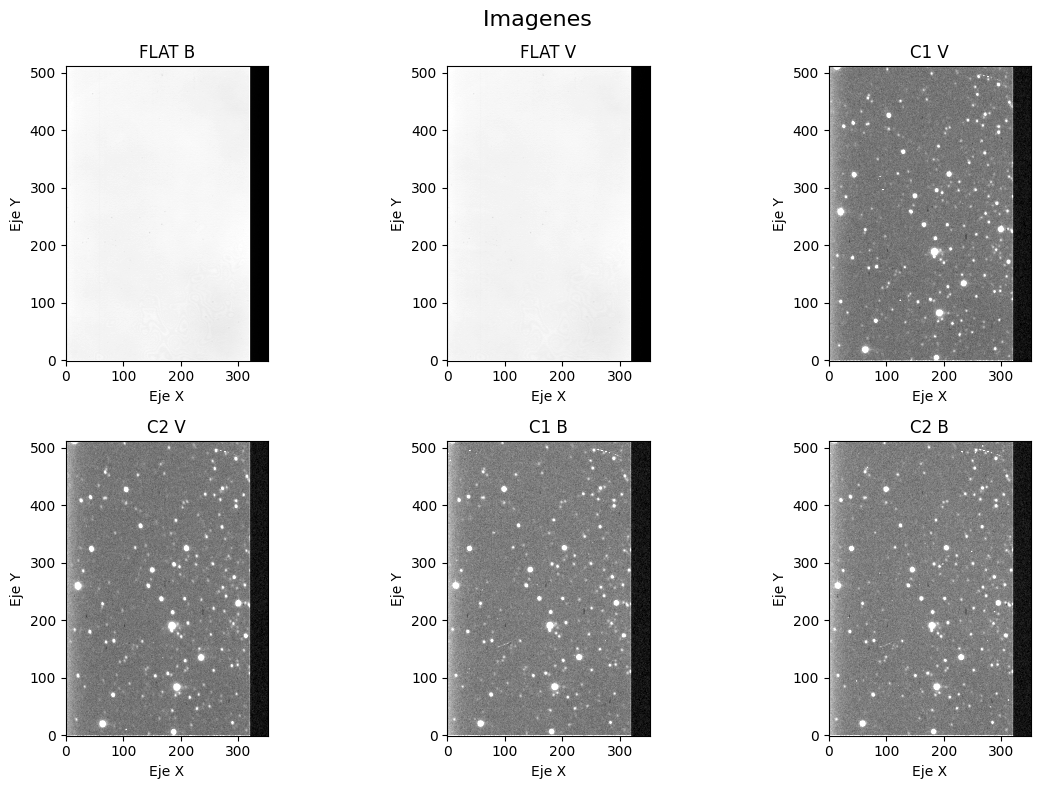

In [302]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(12, 8))

# Iterar sobre las subfiguras y las imágenes
for i, row in enumerate(ax):
    for j, subplot in enumerate(row):
        idx = i * 3 + j + 1
        plt.sca(subplot)
        quantile_imshow(images[idx])
        plt.title(dic[idx][3])
        plt.xlabel('Eje X')  # Añade etiquetas de eje si es apropiado
        plt.ylabel('Eje Y')

# Añadir título a la figura
fig.suptitle('Imagenes ', fontsize=16)

# Ajustar el espaciado entre las subfiguras
plt.tight_layout()

plt.show()

Text(0.5, 1.0, 'Imagen BIAS')

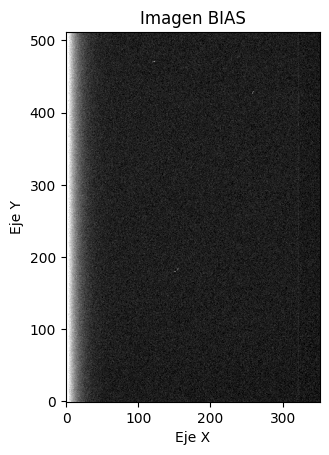

In [304]:
quantile_imshow(images[0])
plt.xlabel('Eje X')  # Añade etiquetas de eje si es apropiado
plt.ylabel('Eje Y')
plt.title("Imagen BIAS")
# Añadi

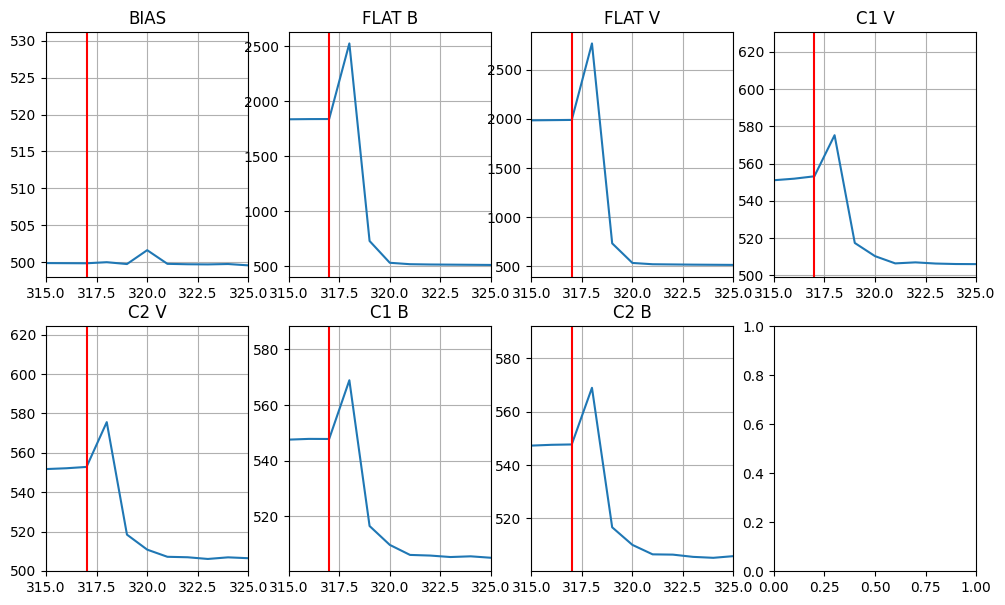

In [306]:
fig, axs = plt.subplots(2, 4, figsize=(12, 7))
for i, ax in enumerate(axs.flat):
    if i < 7:  # Excluir el gráfico 7
        ax.plot(np.mean(images[i], axis=0))
        ax.set_xlim(315, 325)
        ax.axvline(317, c="r")
        ax.set_title(dic[i][3])
        ax.grid(True)

In [307]:
Estadisticas=[]

for i,ik in enumerate(images):
    E=[]
    E.append(np.mean(images[i][320:].ravel()))
    E.append(np.median(images[i][320:].ravel()))
    Estadisticas.append(E)

In [308]:
Dic=np.array(dic)[:,3]
Estad=np.array(Estadisticas)

In [309]:
Estad[0]

array([501.09403113, 500.        ])

In [310]:
Estad[:,0]

array([ 501.09403113, 1711.54828066, 1840.88646721,  547.85231712,  547.70356889,  544.28052498,  544.30341501])

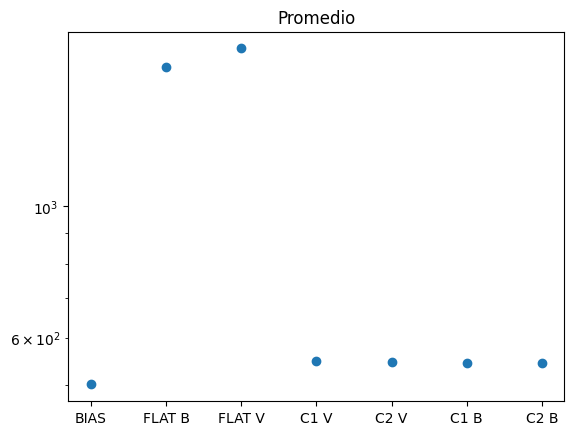

In [311]:
plt.scatter(Dic,Estad[:,0])
plt.title("Promedio")
plt.yscale("log")

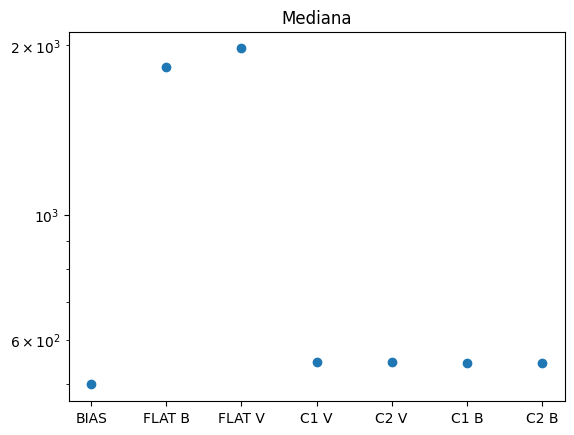

In [312]:
plt.scatter(Dic,Estad[:,1])
plt.title("Mediana")
plt.yscale("log")

## 3) Recorte

Estas imágenes tienen algo llamado _"overscan"_. Discuta brevemente qué entiende de este término, según la explicación del profesor.

### 3.A) detalle del overscan

Grafique el promedio de los pixeles en X (`np.mean(...,axis=0)`) contra los pixeles en Y (`NAXIS1`).
Haga un zoom de su gráfica de promedio a la región de overscan. Para esto puede usar `plt.xlim` y `plt.ylim`.

Determine la región de overscan: píxel inicial y pixel final. Guarde esta información como lo considere conveniente.

Obtenga estadísticas (localización y escala) de las regiones de overscan de al menos dos de las imágenes. 
¿Qué medida de localización y de escala va a usar, y por qué?

### 3.B) imágenes recortadas

Remueva la región de overscan (determinada en el punto anterior) de todas las imágenes. No las modifique, sino que haga copias y guarde las imágenes recortadas como considere.

In [57]:
np.shape(images)


(7, 512, 352)

In [58]:

images=np.array(images)
imagesRec=images[:,2:-2,:317]

In [324]:
Cero=np.zeros(np.shape(imagesRec[0]))

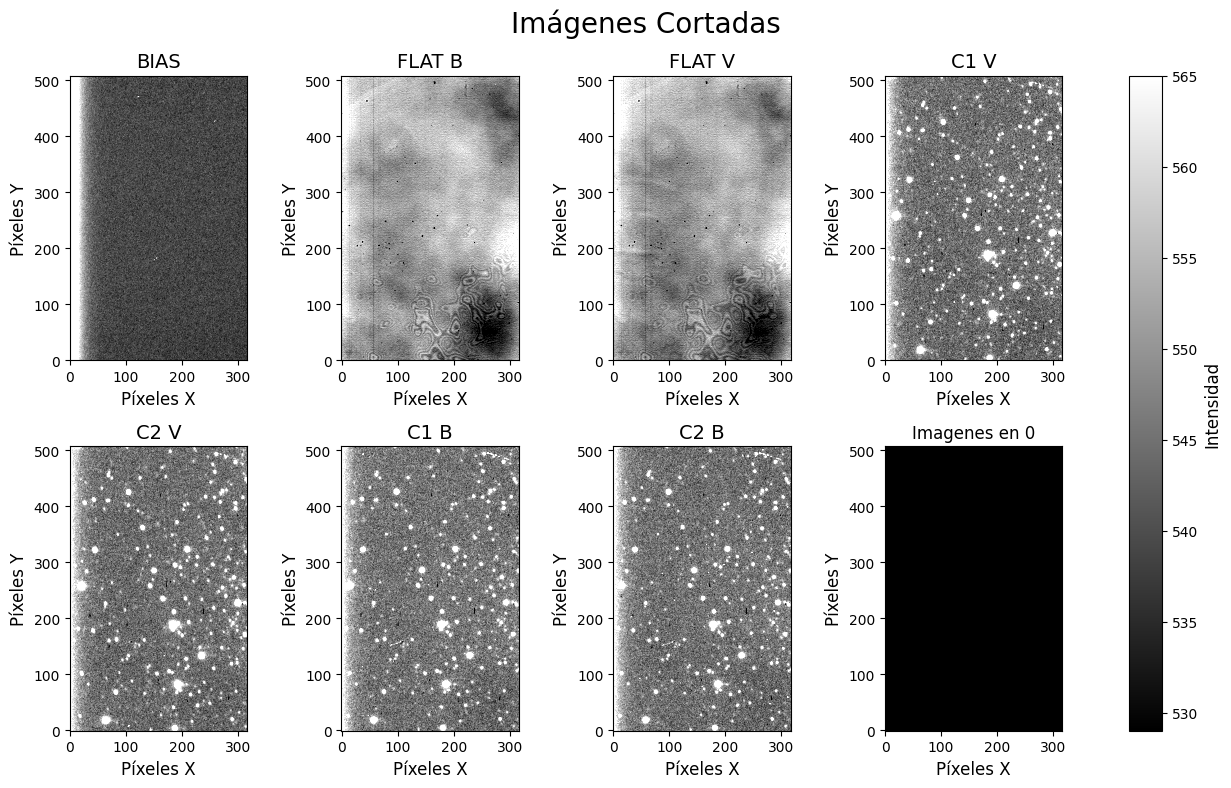

In [326]:
fig, axs = plt.subplots(2, 4, figsize=(14, 8))
fig.suptitle('Imágenes Cortadas', fontsize=20)  # Título principal

for i, ax in enumerate(axs.flat):
    if i != 7:    
        plt.sca(ax)  # Establece el subgráfico activo
        quantile_imshow(imagesRec[i], upper=0.95)  # Muestra la imagen en el subgráfico
        ax.set_title(dic[i][3], fontsize=14)  # Título del subgráfico
        
        ax.set_xlabel('Píxeles X', fontsize=12)  # Etiqueta del eje X
        ax.set_ylabel('Píxeles Y', fontsize=12)  # Etiqueta del eje Y
    if i == 7:
        plt.sca(ax)
        quantile_imshow(Cero)
        ax.set_title("Imagenes en 0")
        ax.set_xlabel('Píxeles X', fontsize=12)  # Etiqueta del eje X
        ax.set_ylabel('Píxeles Y', fontsize=12)
        
        

# Ajustar la disposición para evitar superposiciones
plt.tight_layout()

# Agregar una barra de color común para todas las imágenes
cbar = fig.colorbar(im, ax=axs.ravel().tolist(), orientation='vertical')
cbar.set_label('Intensidad', fontsize=12)

plt.show()


In [339]:
BIAS=imagesRec[0].astype("float")
FLATB=imagesRec[1].astype("float")
FLATV=imagesRec[2].astype("float")
C1V=imagesRec[3].astype("float")
C2V=imagesRec[4].astype("float")
C1B=imagesRec[5].astype("float")
C2B=imagesRec[6].astype("float")

## 4) Bias

Remueva la imagen de bias de todas las imágenes, sean flat o ciencia. De nuevo, no las modifique, haga copias, y organice como considere.

In [340]:
FLATB_BIAS=FLATB-BIAS
FLATV_BIAS=FLATV-BIAS
C1V_BIAS=C1V-BIAS
C2V_BIAS=C2V-BIAS
C1B_BIAS=C1B-BIAS
C2B_BIAS=C2B-BIAS
images_bias=np.array([FLATB_BIAS,FLATV_BIAS,C1B_BIAS,C1V_BIAS,C2B_BIAS,C2V_BIAS])

In [341]:
np.mean(FLATB_BIAS)-np.mean(FLATB)

-501.16000149035017

In [342]:
np.mean(FLATV_BIAS)-np.mean(FLATV)

-501.16000149034994

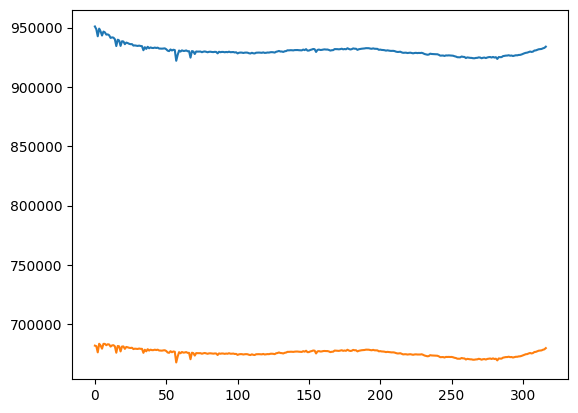

In [343]:
plt.plot(np.sum(FLATB,axis=0))
plt.plot(np.sum(FLATB_BIAS,axis=0))

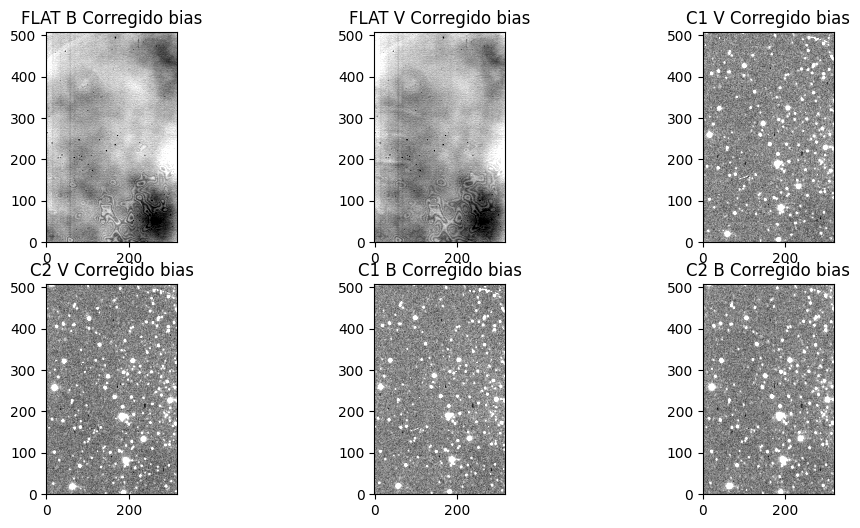

In [344]:
fig, axs = plt.subplots(2, 3, figsize=(12, 6))
for i, ax in enumerate(axs.flat):
    plt.sca(ax)  
    quantile_imshow(images_bias[i],upper=0.95)
    ax.set_title(dic[i+1][3]+str(" Corregido bias"))
    

### 4.extra) comparación con el overscan

Compare los valores del bias con las estádisticas que obtuvo del overscan, y comente.

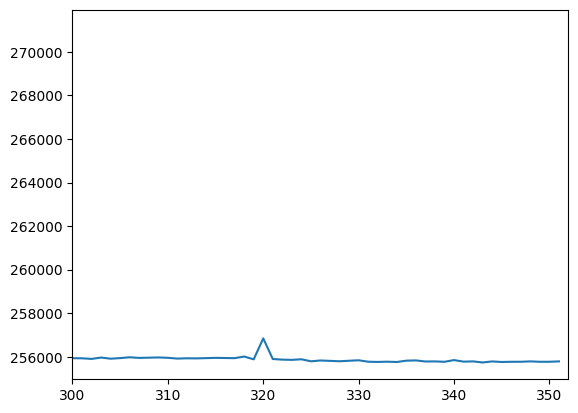

In [465]:
plt.plot(np.sum(images[0],axis=0));
plt.xlim(300,352)
BiasAntes=images[0][:,300:315]
BiasDespues=images[0][:,322:350]

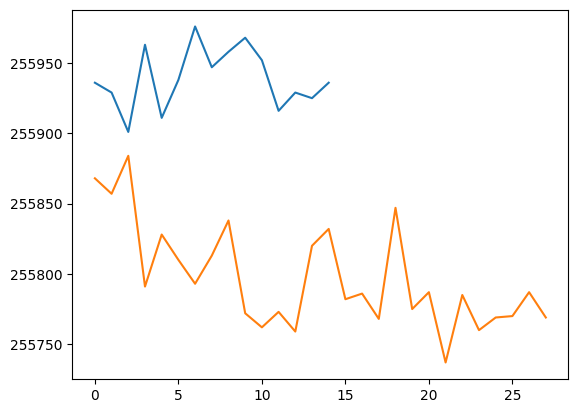

In [466]:
plt.plot(np.sum(BiasAntes,axis=0))
plt.plot(np.sum(BiasDespues,axis=0))

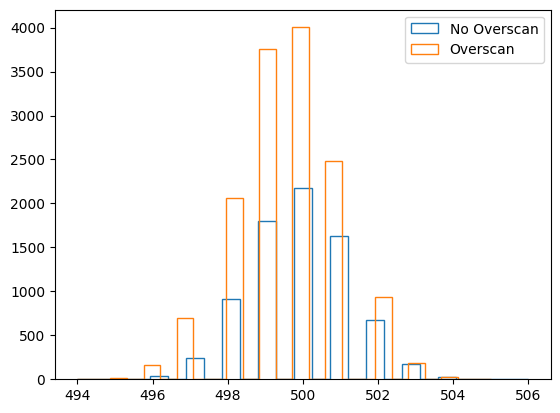

In [467]:
plt.hist(BiasAntes.ravel(),bins=25,histtype="step",label="No Overscan")
plt.hist(BiasDespues.ravel(),bins=25,histtype="step",label="Overscan");
plt.legend()

In [468]:
np.abs((np.mean(BiasAntes)-np.mean(BiasDespues)))/((np.std(BiasAntes)**2+np.std(BiasDespues)**2)**0.5)

0.14139376448568625

## 5) Flat

Normalice las imágenes flat (de nuevo, ¿qué medida de localización va a usar, y por qué?), y aplique el flat a las imágenes ciencia, teniendo cuidado de usar el filtro apropiado.

In [469]:
FLATB_Norm=FLATB_BIAS/np.mean(FLATB_BIAS)
FLATV_Norm=FLATV_BIAS/np.mean(FLATV_BIAS)

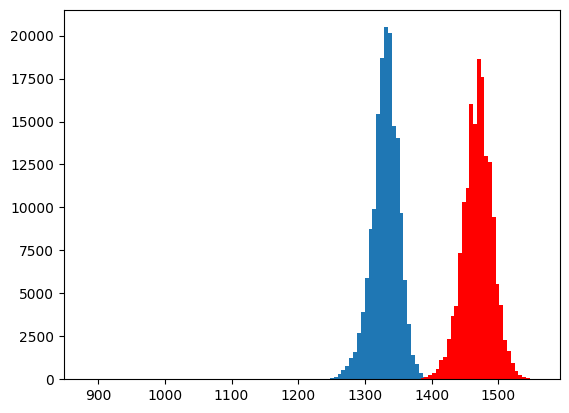

In [470]:
plt.hist(FLATB_BIAS.ravel(),bins=100)
plt.hist(FLATV_BIAS.ravel(),bins=100,color="red");

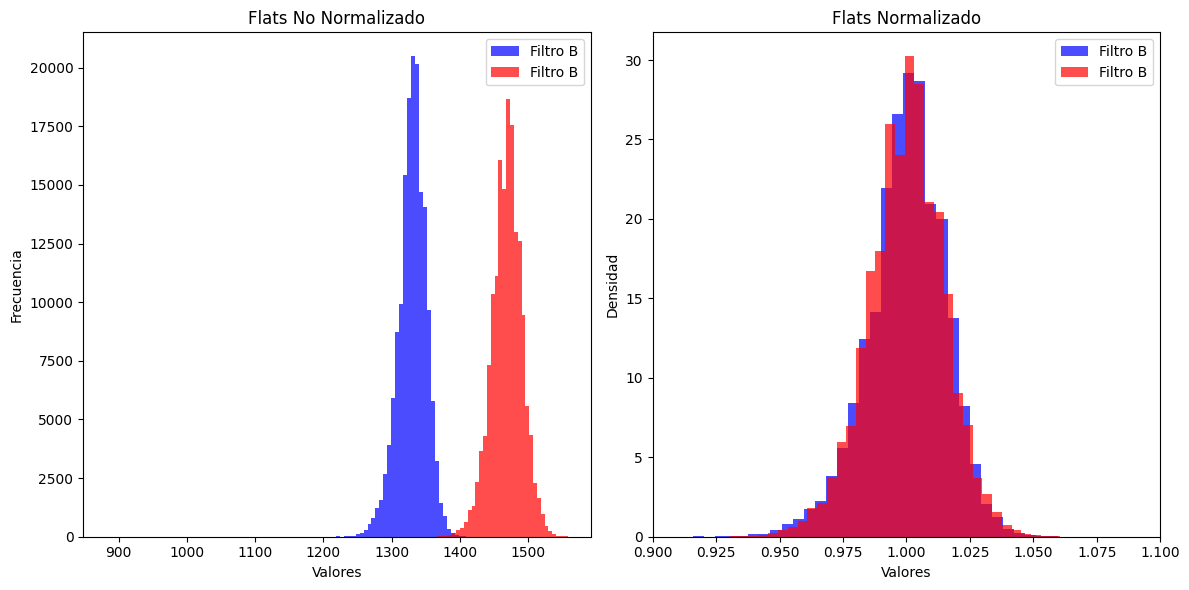

In [471]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Histograma para FLATB_BIAS y FLATV_BIAS (no normalizado)
axs[0].hist(FLATB_BIAS.ravel(), bins=100, color='blue', alpha=0.7,label="Filtro B")
axs[0].hist(FLATV_BIAS.ravel(), bins=100, color='red', alpha=0.7,label="Filtro B")
axs[0].set_title('Flats No Normalizado')
axs[0].set_xlabel('Valores')
axs[0].set_ylabel('Frecuencia')
axs[0].legend()

# Histograma para FLATB_Norm y FLATV_Norm (normalizado)
axs[1].hist(FLATB_Norm.ravel(), bins=100, color='blue', alpha=0.7, density=True,label="Filtro B")
axs[1].hist(FLATV_Norm.ravel(), bins=100, color='red', alpha=0.7, density=True,label="Filtro B")
axs[1].set_title('Flats Normalizado')
axs[1].set_xlabel('Valores')
axs[1].set_ylabel('Densidad')
axs[1].set_xlim(0.9,1.1)

# Ajustar el espaciado entre subgráficos
plt.tight_layout()
plt.legend()
# Mostrar el gráfico
plt.show()


(0.9, 1.1)

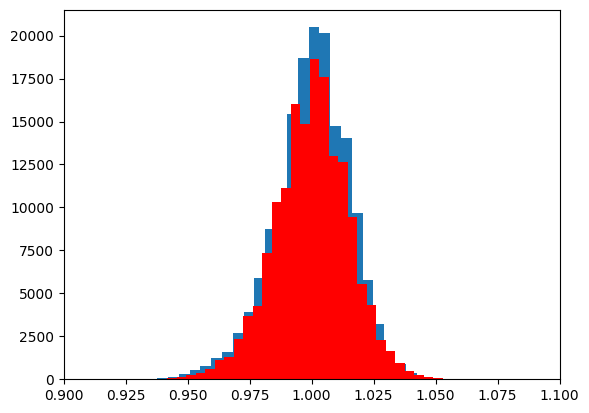

In [472]:
plt.hist(FLATB_Norm.ravel(),bins=100)
plt.hist(FLATV_Norm.ravel(),bins=100,color="red");
plt.xlim(0.9,1.1)

In [473]:
Science1B=C1B_BIAS/FLATB_Norm
Science1V=C1V_BIAS/FLATV_Norm
Science2B=C2B_BIAS/FLATB_Norm
Science2V=C2V_BIAS/FLATV_Norm
Siencie=np.array([Science1B,Science1V,Science2B,Science2V])
SienciePR=np.array([Science1V,Science2V,Science1B,Science2B])
Title=["Ciencia1B","Ciencia1V","Ciencia2B","Ciencia2V"]

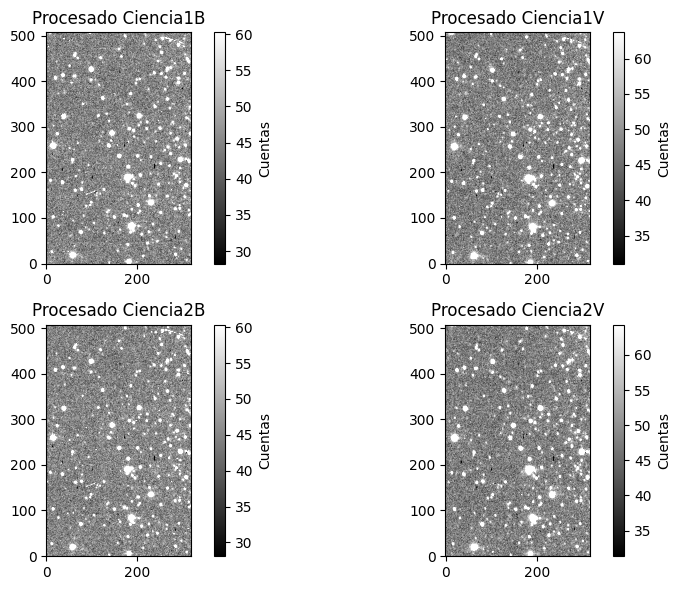

In [474]:
fig, axs = plt.subplots(2, 2, figsize=(9, 6))

# Iterar sobre cada subtrama y generar la visualización
for i, ax in enumerate(axs.flat):
    plt.sca(ax)  
    quantile_imshow(Siencie[i], upper=0.95)
    plt.title("Procesado " + Title[i])
    
    # Agregar un colorbar a cada subtrama
    cbar = plt.colorbar()
    cbar.set_label('Cuentas')  # Puedes ajustar la etiqueta del colorbar según tus necesidades

# Ajustar el diseño de las subtramas
plt.tight_layout()

# Mostrar la figura
plt.show()
    

In [475]:
Flats=imagesRec[3:]/SienciePR

C:\Users\grado\AppData\Local\Temp\ipykernel_31468\3621349138.py:1: RuntimeWarning: divide by zero encountered in divide
  Flats=imagesRec[3:]/SienciePR


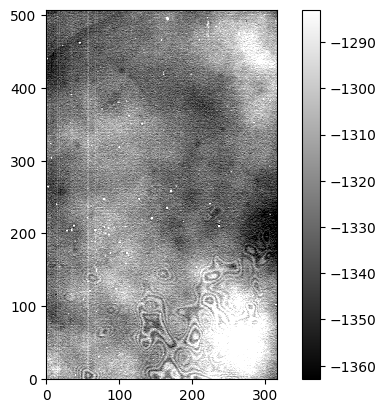

In [476]:

quantile_imshow(Flats[0]-FLATB_BIAS,upper=0.95)
plt.colorbar()

## 6) Guardar las imágenes calibradas

Primero, copie los headers originales de las imágenes ciencia, y agregue un comentario describiendo **_muy brevemente_** el proceso de reducción realizado.

Para guardar sus resultados en formato fits, para cada imagen ciencia calibrada, use la función `fits.PrimaryHDU`. 
Use los headers que contienen su comentario.

Una vez obtenido el objeto `PrimaryHDU`, use el método `hdu.writeto`. Ponga un nombre descriptivo, pero corto, a las imágenes resultantes.

In [477]:
Headers=[]
for i in files[3:]:
    Headers.append(fits.getheader(i).copy())

In [478]:
print(Headers)

[SIMPLE  =                    T  /  FITS STANDARD                                
BITPIX  =                   16  /  FITS BITS/PIXEL                              
NAXIS   =                    2  /  NUMBER OF AXES                               
NAXIS1  =                  352  /                                               
NAXIS2  =                  512  /                                               
BSCALE  =       1.0000000000E0  /  REAL = TAPE*BSCALE + BZERO                   
BZERO   =       0.0000000000E0  /                                               
OBJECT  = 'M-92 V  '            /                                               
ORIGIN  = 'KPNO-IRAF'           /                                               
DATE    = '17-09-93'            /                                               
IRAFNAME= 'm92010.imh'          /  NAME OF IRAF IMAGE FILE                      
IRAF-MAX=           1.064900E4  /  DATA MAX                                     
IRAF-MIN=           4.81000

In [479]:
for i in Headers:
    i["History"]="Imagen procesada eliminando BIAS y reducida con FLAT"

In [480]:

hdu=fits.PrimaryHDU(data=Science1V,header=Headers[0])
hdu.writeto("ImagenReducida1V.fits",overwrite=True)
hdu=fits.PrimaryHDU(data=Science2V,header=Headers[1])
hdu.writeto("ImagenReducida2V.fits",overwrite=True)
hdu=fits.PrimaryHDU(data=Science1B,header=Headers[2])
hdu.writeto("ImagenReducida1B.fits",overwrite=True)
hdu=fits.PrimaryHDU(data=Science2B,header=Headers[3])
hdu.writeto("ImagenReducida2B.fits",overwrite=True)

### 6.extra) 

Cree un subplot con las imágenes ciencia calibradas, con barras de color indicando las cuentas.

# Alcyone, desde el observatorio uniandes

En la carpeta `data/uniandes` hay una imagen de Alcyone, en la región de las Pléyades, junto con sus imágenes de calibración: 9 bias, 0 darks, y 3 flats.

## 1) Main-flat, main-bias, main-dark

Obtenga de nuevo los tipos de las imágenes. Promedie todos los flats, todos los bias, y todos los darks, para obtener las imágenes "master", o "main".

### 1.extra)

Usando `astropy.modeling` [(documentación aquí)](https://docs.astropy.org/en/stable/modeling/index.html), realice un model 2D del main-bias. 

In [391]:
from astropy.modeling.models import custom_model
from astropy.modeling import fitting
from scipy.optimize import curve_fit
fitter = fitting.LevMarLSQFitter()

Para guiarse en esto, grafique los primedios de los pixeles en X y en Y. ¿Qué función se le ocurre que se comporta así?

317


C:\Users\grado\AppData\Local\Temp\ipykernel_31468\3278293547.py:3: RuntimeWarning: overflow encountered in exp
  return c-b*np.exp(-x*a)
C:\Users\grado\AppData\Local\Temp\ipykernel_31468\3278293547.py:3: RuntimeWarning: overflow encountered in multiply
  return c-b*np.exp(-x*a)


Text(0.5, 1.0, 'Perfil en Y')

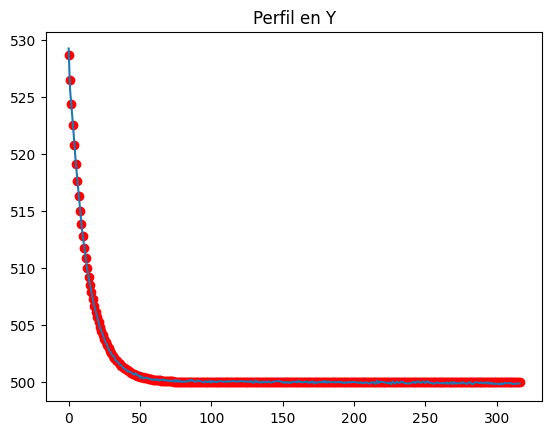

In [445]:
plt.plot(np.mean(BIAS,axis=0),label="Perfil Y")
def biasEjey(x,a,c,b):
    return c-b*np.exp(-x*a)
print((len(np.mean(BIAS,axis=0))))
np.arange(317)
parametrosy,popva=curve_fit(biasEjey,np.arange(len(np.mean(BIAS,axis=0))),np.mean(BIAS,axis=0),p0=[1,500,10])
plt.scatter(np.arange(317),biasEjey(np.arange(317),*parametrosy),c="r",label="Ajuste")
plt.title("Perfil en Y")

C:\Users\grado\AppData\Local\Temp\ipykernel_31468\2894981278.py:11: RuntimeWarning: overflow encountered in exp
  return c - b * np.exp(-x * a)


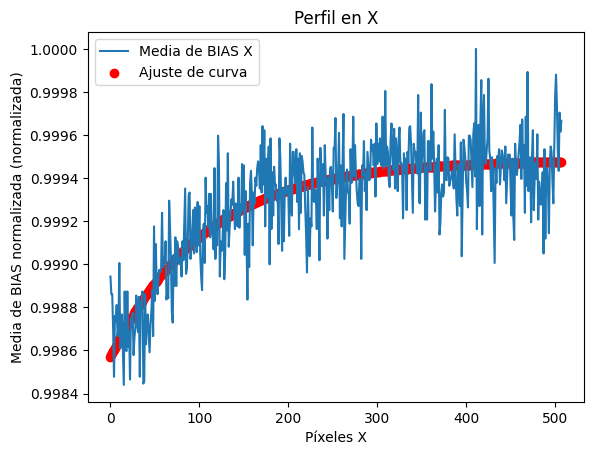

In [447]:
mean_bias_normalized = np.mean(BIAS, axis=1) / np.max(np.mean(BIAS, axis=1))

# Graficar la media de BIAS normalizada
plt.plot(mean_bias_normalized, label='Media de BIAS X')
plt.xlabel('Píxeles X')
plt.ylabel('Media de BIAS normalizada (normalizada)')
plt.title('Perfil en X')

# Definir la función de ajuste exponencial
def biasEjex(x , a, c, b):
    return c - b * np.exp(-x * a)

# Ajustar la curva exponencial sobre la media de BIAS normalizada
x_data = np.arange(len(mean_bias_normalized))
parameters_X, _ = curve_fit(biasEjex, x_data, mean_bias_normalized, p0=[1, 500, 10])
plt.scatter(np.arange(len(mean_bias_normalized)), biasEjex(np.arange(len(mean_bias_normalized)), *parameters_X), c="r", label='Ajuste de curva')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

In [394]:
def bias_model(x,y,ax,bx,cx,ay,by,cy):
    return biasEjey(y,ay,by,cy)*biasEjex(x,ax,bx,cx)
    #return su modelo aquí
BiasModel = custom_model(bias_model)
bias_model = BiasModel()

Use el `fitter` para ajustar la imagen. Va a necesitar una grilla de pixeles como input al modelo. Yo recomiendo usar:

```python
X,Y = np.mgrid[:x_px_max,:y_px_max]
```

Donde `px_max` son la cantidad de pixeles en X y en Y.

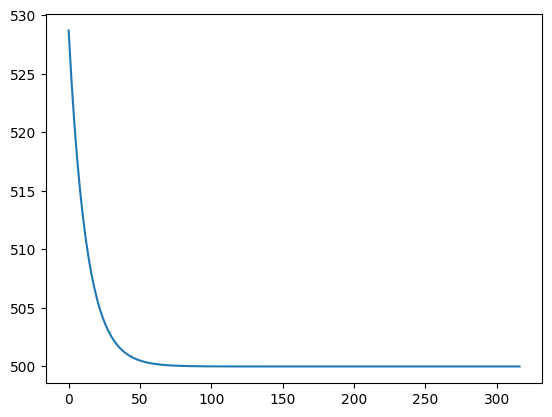

In [448]:
plt.plot(biasEjey(np.arange(317),*parametrosy))

In [449]:
np.shape(BIAS_2)

(512, 352)

In [450]:
X,Y=np.mgrid[:512,:352]
BiasModelo=bias_model(X,Y,*parametrosX,*parametrosy)


In [451]:
parametrosY

array([9.44618023e-03, 5.01255100e+02, 4.57969709e-01])

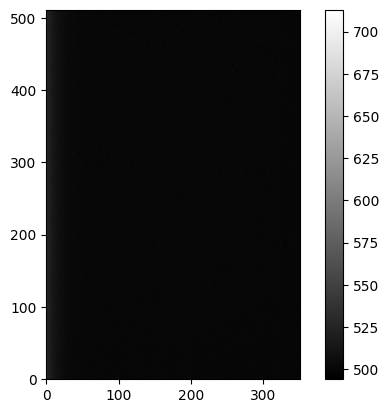

In [452]:
plt.imshow(BIAS_2)
plt.colorbar()

Text(0, 0.5, 'Pixel Y')

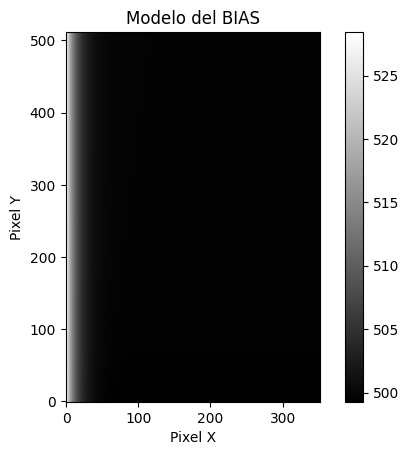

In [454]:
plt.imshow(BiasModelo)
plt.colorbar()
plt.title("Modelo del BIAS")
plt.xlabel("Pixel X")
plt.ylabel("Pixel Y")

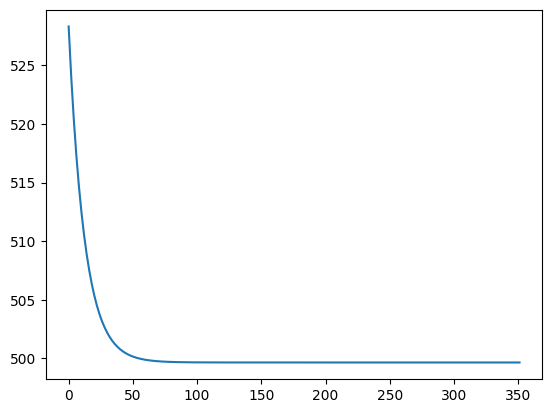

In [455]:
plt.plot(np.mean(BiasModelo,axis=0))

In [456]:
R=BiasModelo-BIAS_2

Text(0, 0.5, 'Pixel Y')

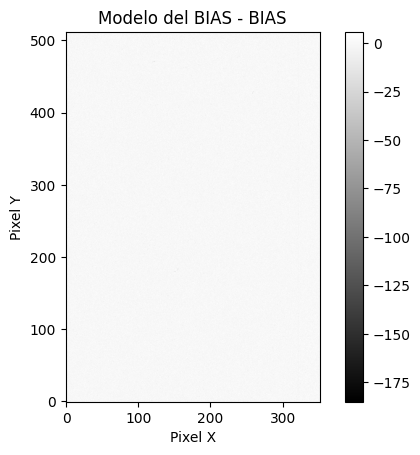

In [457]:
plt.imshow(R)
plt.colorbar()
plt.title("Modelo del BIAS - BIAS")
plt.xlabel("Pixel X")
plt.ylabel("Pixel Y")

Text(0, 0.5, 'Frecuencia')

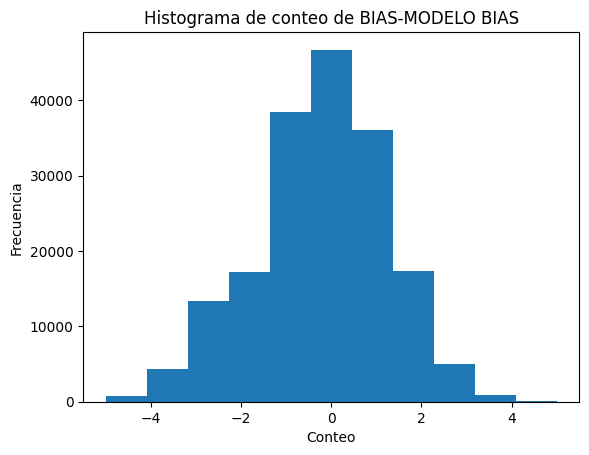

In [459]:
plt.hist(R.ravel(),bins=np.linspace(-5,5,12));
plt.title("Histograma de conteo de BIAS-MODELO BIAS")
plt.xlabel("Conteo")
plt.ylabel("Frecuencia")

Se recomienda analizar los residuales del modelo `main_bias - bias_model(X,Y)`; deberían ser Gaussianos y tener media cero, y su imagen debería ser plana.

¿Qué diferencia hay entre restar la imagen bias y restar el modelo, si este modelo es bueno?

## 2) Reducción

Ya que esta imagen no tiene overscan, no necesita ser recortada. Aplique directamente la calibración, incluyendo el main-dark.

Guarde la imagen calibrada en un .fits como en el ejercicio anterior.

In [431]:
dic

[[1, 'BIAS', 'ave of 25 bias', 'BIAS'],
 [2, 'DOME FLAT', 'ave of  5 Harris B Sept 1 1987', 'FLAT B'],
 [3, 'DOME FLAT', 'ave of  5 V filter dome flat  1-sept-87', 'FLAT V'],
 [4, 'OBJECT', 'M-92 V', 'C1 V'],
 [5, 'OBJECT', 'M-92 V', 'C2 V'],
 [6, 'OBJECT', 'M-92 B', 'C1 B'],
 [7, 'OBJECT', 'M-92 B', 'C2 B']]

In [433]:
FLATB_2_BIAS=FLATB_2-BiasModelo
FLATV_2_BIAS=FLATV_2-BiasModelo
SCI1V_2_BIAS=SCI1V_2-BiasModelo
SCI2V_2_BIAS=SCI2V_2-BiasModelo
SCI1B_2_BIAS=SCI1B_2-BiasModelo
SCI2B_2_BIAS=SCI2B_2-BiasModelo

FLATB_2_BIAS_norm=FLATB_2_BIAS/np.mean(FLATB_2_BIAS)
FLATV_2_BIAS_norm=FLATV_2_BIAS/np.mean(FLATV_2_BIAS)

SCI1V_ModelBias=SCI1V_2_BIAS/FLATV_2_BIAS_norm
SCI2V_ModelBias=SCI2V_2_BIAS/FLATV_2_BIAS_norm
SCI1B_ModelBias=SCI1B_2_BIAS/FLATB_2_BIAS_norm
SCI2B_ModelBias=SCI2B_2_BIAS/FLATB_2_BIAS_norm


In [437]:
Title
Scien_model=[SCI1B_ModelBias[:,:317],SCI1V_ModelBias[:,:317],SCI2B_ModelBias[:,:317],SCI2V_ModelBias[:,:317]]

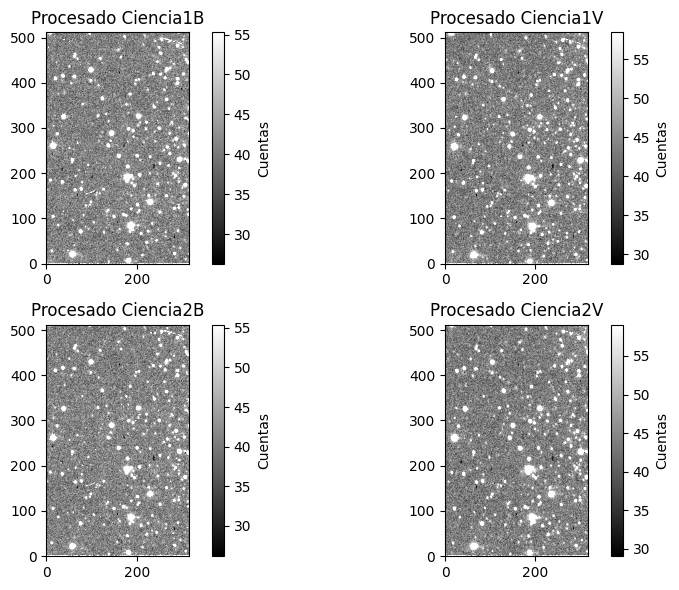

In [438]:
fig, axs = plt.subplots(2, 2, figsize=(9, 6))

# Iterar sobre cada subtrama y generar la visualización
for i, ax in enumerate(axs.flat):
    plt.sca(ax)  
    quantile_imshow(Scien_model[i], upper=0.95)
    plt.title("Procesado " + Title[i])
    
    # Agregar un colorbar a cada subtrama
    cbar = plt.colorbar()
    cbar.set_label('Cuentas')  # Puedes ajustar la etiqueta del colorbar según tus necesidades

# Ajustar el diseño de las subtramas
plt.tight_layout()

# Mostrar la figura
plt.show()
    

In [462]:
Headers=[]
for i in files[3:]:
    Headers.append(fits.getheader(i).copy())

In [463]:
for i in Headers:
    i["History"]="Imagen procesada eliminando BIAS MODELO y reducida con FLAT "

In [464]:

hdu=fits.PrimaryHDU(data=SCI1B_ModelBias,header=Headers[0])
hdu.writeto("ImagenReducidaModelo1V.fits",overwrite=True)
hdu=fits.PrimaryHDU(data=SCI2V_ModelBias,header=Headers[1])
hdu.writeto("ImagenReducidaModelo2V.fits",overwrite=True)
hdu=fits.PrimaryHDU(data=SCI1B_ModelBias,header=Headers[2])
hdu.writeto("ImagenReducidaModelo1B.fits",overwrite=True)
hdu=fits.PrimaryHDU(data=SCI2B_ModelBias,header=Headers[3])
hdu.writeto("ImagenReducidaModelo2B.fits",overwrite=True)